In [41]:
%matplotlib inline
import pandas as pd
import wikipedia
import numpy as np
from pprint import pprint
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from config import api_key
from datetime import datetime

In [2]:
apple_announcement_df =pd.read_excel("data\Apple Keynote Announcements.xlsx")

#print(apple_announcement_df["New Date"])

for index, row in apple_announcement_df.iterrows():
    apple_announcement_df.loc[index, "New Month"] = row["New Date"]
    apple_month = row["New Date"]
    if (len(apple_month)==6):
        apple_date=apple_month[0:5]+'0'+apple_month[5:6]
        apple_announcement_df.loc[index, "New Month"]=apple_date

#print(apple_announcement_df["New Month"])
apple_announce = pd.DataFrame({
    "date" : apple_announcement_df["New Month"],
    'event' : True
})
apple_announce.sort_index(axis=0, inplace=True, ascending=False)
print(apple_announce.head())

       date  event
41  2007-01   True
40  2008-01   True
39  2008-03   True
38  2008-06   True
37  2008-09   True


In [3]:
Month_abbr={'01':'JAN','02':'FEB','03':"MAR",'04':'APR','05':"MAY",'06':"JUN",'07':"JUL",'08':"AUG",'09':'SEP','10':"OCT",'11':"NOV", '12':"DEC"}


In [4]:
iphone_prod = ['iphone 5','iphone 5C','iphone 6','iphone 6S','iphone SE','iphone 7','iphone 8','iphone X','iphone XS','iphone XR']
iphone_date=['2012-09','2013-09','2014-09','2015-09','2016-03','2016-09','2017-09','2017-11','2018-09','2018-10']

iphone_df = pd.DataFrame({"iphone_prod": iphone_prod,
                          "date" : iphone_date})

#iphone_df["close"]=np.nan
iphone_df

,iphone_prod,date
0,iphone 5,2012-09
1,iphone 5C,2013-09
2,iphone 6,2014-09
3,iphone 6S,2015-09
4,iphone SE,2016-03
5,iphone 7,2016-09
6,iphone 8,2017-09
7,iphone X,2017-11
8,iphone XS,2018-09
9,iphone XR,2018-10


In [5]:
dis_income_df =pd.read_csv("data\DSPIC96.csv")
len_dis_income = dis_income_df.count()


print(dis_income_df.head(40))

         DATE  DSPIC96
0    1/1/1959   2187.2
1    2/1/1959   2193.8
2    3/1/1959   2206.4
3    4/1/1959   2220.7
4    5/1/1959   2232.8
5    6/1/1959   2240.2
6    7/1/1959   2236.7
7    8/1/1959   2223.5
8    9/1/1959   2224.4
9   10/1/1959   2226.1
10  11/1/1959   2242.1
11  12/1/1959   2263.9
12   1/1/1960   2268.8
13   2/1/1960   2269.2
14   3/1/1960   2271.9
15   4/1/1960   2280.6
16   5/1/1960   2285.6
17   6/1/1960   2287.7
18   7/1/1960   2291.4
19   8/1/1960   2286.2
20   9/1/1960   2289.4
21  10/1/1960   2297.8
22  11/1/1960   2288.3
23  12/1/1960   2278.0
24   1/1/1961   2300.0
25   2/1/1961   2309.6
26   3/1/1961   2319.3
27   4/1/1961   2324.1
28   5/1/1961   2343.0
29   6/1/1961   2367.1
30   7/1/1961   2375.2
31   8/1/1961   2375.3
32   9/1/1961   2377.4
33  10/1/1961   2402.5
34  11/1/1961   2424.7
35  12/1/1961   2439.5
36   1/1/1962   2433.4
37   2/1/1962   2444.4
38   3/1/1962   2460.6
39   4/1/1962   2471.5


In [6]:
# disposable income -only select 2012 and beyond

dis_date=[]
dis_inc=[]
dis_abbr=[]
for index, row in dis_income_df.iterrows():
    yyyy_mm = f'{row["DATE"][4:9]}-0{row["DATE"][0:1]}'
    if row["DATE"][0:2] =='10' or row["DATE"][0:2] =='11' or row["DATE"][0:2] =='12' :
        yyyy_mm = f'{row["DATE"][5:10]}-{row["DATE"][0:2]}'
    if yyyy_mm > '2012':
        dis_date.append(yyyy_mm)
        income = row["DSPIC96"]
        dis_inc.append(income)
        dis_abbr.append(f'{Month_abbr[yyyy_mm[5:7]]}-{yyyy_mm[2:4]}')

disp_income_df = pd.DataFrame({
    "Date" : dis_date,
    "Disp_Inc" : dis_inc,
    "Abbr_Date" : dis_abbr
})

disp_income_df.head()

,Date,Disp_Inc,Abbr_Date
0,2012-01,12311.0,JAN-12
1,2012-02,12385.4,FEB-12
2,2012-03,12429.3,MAR-12
3,2012-04,12477.1,APR-12
4,2012-05,12487.5,MAY-12


In [7]:
x_axis_dis = np.arange(len(disp_income_df))
tick_locations = [value+0.4 for value in x_axis_dis]


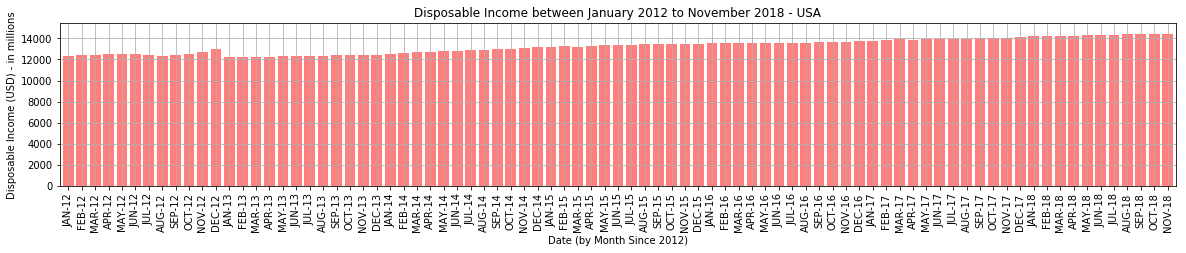

In [8]:
plt.figure(figsize=(20,3))
plt.bar(x_axis_dis, disp_income_df["Disp_Inc"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, disp_income_df["Abbr_Date"], rotation='vertical')
plt.xlim(-0.25, len(x_axis_dis))
plt.title("Disposable Income between January 2012 to November 2018 - USA")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Disposable Income (USD) - in millions")
plt.ylim(0, max(disp_income_df["Disp_Inc"])+1000)
plt.grid()
plt.show()

In [9]:
print(len(disp_income_df))
print(disp_income_df)

83
       Date  Disp_Inc Abbr_Date
0   2012-01   12311.0    JAN-12
1   2012-02   12385.4    FEB-12
2   2012-03   12429.3    MAR-12
3   2012-04   12477.1    APR-12
4   2012-05   12487.5    MAY-12
5   2012-06   12498.7    JUN-12
6   2012-07   12410.1    JUL-12
7   2012-08   12362.6    AUG-12
8   2012-09   12422.5    SEP-12
9   2012-10   12516.4    OCT-12
10  2012-11   12693.1    NOV-12
11  2012-12   13016.3    DEC-12
12  2013-01   12266.8    JAN-13
13  2013-02   12205.2    FEB-13
14  2013-03   12223.9    MAR-13
15  2013-04   12271.9    APR-13
16  2013-05   12342.2    MAY-13
17  2013-06   12355.0    JUN-13
18  2013-07   12341.5    JUL-13
19  2013-08   12368.7    AUG-13
20  2013-09   12418.7    SEP-13
21  2013-10   12386.0    OCT-13
22  2013-11   12425.3    NOV-13
23  2013-12   12464.3    DEC-13
24  2014-01   12532.0    JAN-14
25  2014-02   12618.0    FEB-14
26  2014-03   12693.3    MAR-14
27  2014-04   12725.5    APR-14
28  2014-05   12760.6    MAY-14
29  2014-06   12811.7    JUN-14
..   

In [10]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_monthly(symbol='AAPL')

In [11]:
new_data=data
new_data.reset_index(inplace=True)
print(new_data.head())


         date  1. open  2. high  3. low  4. close   5. volume
0  1998-02-27    18.50    23.87   17.37     23.62  65662200.0
1  1998-03-31    23.56    28.00   21.62     27.50  94874800.0
2  1998-04-30    27.44    29.62   24.69     27.37  72159700.0
3  1998-05-29    27.50    31.62   25.62     26.62  60744100.0
4  1998-06-30    26.50    29.00   25.62     28.69  34909300.0


In [12]:
#print(new_data.columns)
stock_data=[]
stock_close=[]
stock_diff=[]
stock_open=[]
stock_perc=[]
stock_abbr=[]

for index, row in new_data.iterrows():
    new_date = row["date"][0:7]
    new_close=row["4. close"]
    new_open=row["1. open"]
    if new_date>='2012':
        stock_data.append(new_date)
        stock_abbr.append(f'{Month_abbr[new_date[5:7]]}-{new_date[2:4]}')
        if new_date<='2014-06':
            new_open = new_open / 7
            if new_date<'2014-06':
                new_close = new_close / 7
        perc = round((new_close-new_open) *100 / new_open,2)
        stock_perc.append(perc)
        stock_close.append(new_close)
        stock_open.append(new_open)
        stock_diff.append(new_close - new_open)
        
#print(len(stock_data))
#print(len(stock_close))
#print(stock_data)

new_stock_dict = {
    "date" : stock_data,
    "open" : stock_open,
    "close" : stock_close,
    "diff" : stock_diff,
    "percentage" : stock_perc,
    "abbr_date" : stock_abbr
}

stock_data_df = pd.DataFrame(new_stock_dict)

print(stock_data_df)

       date        open       close       diff  percentage abbr_date
0   2012-01   58.485714   65.211429   6.725714       11.50    JAN-12
1   2012-02   65.487143   77.491429  12.004286       18.33    FEB-12
2   2012-03   78.310000   85.650000   7.340000        9.37    MAR-12
3   2012-04   85.975714   83.425714  -2.550000       -2.97    APR-12
4   2012-05   83.557143   82.532857  -1.024286       -1.23    MAY-12
5   2012-06   81.308571   83.428571   2.120000        2.61    JUN-12
6   2012-07   83.532857   87.251429   3.718571        4.45    JUL-12
7   2012-08   87.986429   95.034286   7.047857        8.01    AUG-12
8   2012-09   95.108571   95.300714   0.192143        0.20    SEP-12
9   2012-10   95.928571   85.045714 -10.882857      -11.34    OCT-12
10  2012-11   85.460000   83.611429  -1.848571       -2.16    NOV-12
11  2012-12   84.807143   76.024700  -8.782443      -10.36    DEC-12
12  2013-01   79.117143   65.070000 -14.047143      -17.75    JAN-13
13  2013-02   65.587143   63.05714

In [13]:

apple_merge = pd.merge(stock_data_df, apple_announce, how='left', on="date")
        
#        for i in range(0, len(stock_data_df)):
#    if stock_data_df["date"] == apple_announcement_df["New Month"]:
#        stock_data_df['event'] = stock_data_df['close']

        
apple_prod_merge = pd.merge(apple_merge, iphone_df, how='left', on="date")
        

print(apple_prod_merge.head(30))
print(apple_prod_merge.columns)

       date       open      close       diff  percentage abbr_date event  \
0   2012-01  58.485714  65.211429   6.725714       11.50    JAN-12  True   
1   2012-02  65.487143  77.491429  12.004286       18.33    FEB-12   NaN   
2   2012-03  78.310000  85.650000   7.340000        9.37    MAR-12  True   
3   2012-04  85.975714  83.425714  -2.550000       -2.97    APR-12   NaN   
4   2012-05  83.557143  82.532857  -1.024286       -1.23    MAY-12   NaN   
5   2012-06  81.308571  83.428571   2.120000        2.61    JUN-12  True   
6   2012-07  83.532857  87.251429   3.718571        4.45    JUL-12   NaN   
7   2012-08  87.986429  95.034286   7.047857        8.01    AUG-12   NaN   
8   2012-09  95.108571  95.300714   0.192143        0.20    SEP-12  True   
9   2012-10  95.928571  85.045714 -10.882857      -11.34    OCT-12  True   
10  2012-11  85.460000  83.611429  -1.848571       -2.16    NOV-12   NaN   
11  2012-12  84.807143  76.024700  -8.782443      -10.36    DEC-12   NaN   
12  2013-01 

In [14]:
#stock_iphone_df=apple_prod_merge.loc[apple_prod_merge["iphone_prod"]==np.NaN]
stock_iphone_date=[]
stock_iphone_close=[]
stock_iphone_prod=[]
stock_iphone_abbr=[]

for index, row in apple_prod_merge.iterrows():
    iphone_prod_id = str(row["iphone_prod"])
    new_date=row["date"]
    if 'iphone' in iphone_prod_id:
        stock_iphone_abbr.append(f'{Month_abbr[new_date[5:7]]}-{new_date[2:4]}')
        stock_iphone_date.append(row["date"])
        stock_iphone_close.append(row["close"])
        stock_iphone_prod.append(row["iphone_prod"])
stock_iphone_df =pd.DataFrame({
  "iphone_date" : stock_iphone_date,
  "iphone_abbr" : stock_iphone_abbr,
  "iphone_close" : stock_iphone_close,
  "iphone_prod" : stock_iphone_prod
})        

print(stock_iphone_df)

  iphone_date iphone_abbr  iphone_close iphone_prod
0     2012-09      SEP-12     95.300714    iphone 5
1     2013-09      SEP-13     68.107143   iphone 5C
2     2014-09      SEP-14    100.750000    iphone 6
3     2015-09      SEP-15    110.300000   iphone 6S
4     2016-03      MAR-16    108.990000   iphone SE
5     2016-09      SEP-16    113.050000    iphone 7
6     2017-09      SEP-17    154.120000    iphone 8
7     2017-11      NOV-17    171.850000    iphone X
8     2018-09      SEP-18    225.740000   iphone XS
9     2018-10      OCT-18    218.860000   iphone XR


In [15]:
stock_event_date=[]
stock_event_close=[]
stock_event_abbr=[]
for index, row in apple_merge.iterrows():
    if row["event"]==True:
        stock_event_date.append(row["date"])
        stock_event_close.append(row["close"])
        stock_event_abbr.append(row["abbr_date"])
stock_event_df =pd.DataFrame({
  "event_date" : stock_event_date,
  "event_close" : stock_event_close,
  "event_abbr" : stock_event_abbr
})        

print(stock_event_df.head())

  event_date  event_close event_abbr
0    2012-01    65.211429     JAN-12
1    2012-03    85.650000     MAR-12
2    2012-06    83.428571     JUN-12
3    2012-09    95.300714     SEP-12
4    2012-10    85.045714     OCT-12


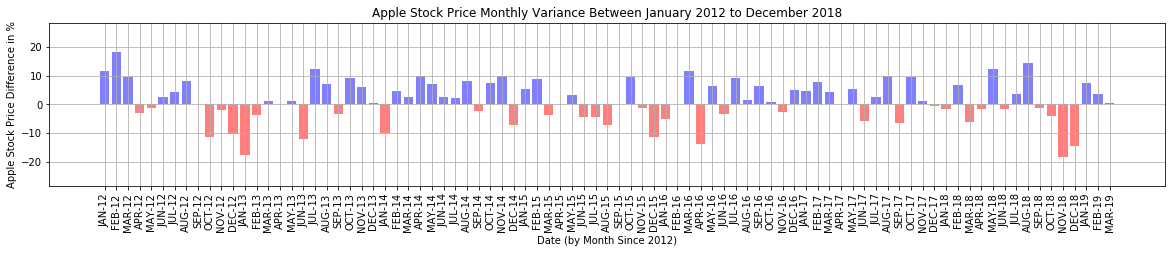

In [16]:
plt.figure(figsize=(20,3))
x_axis_stock = np.arange(len(stock_data_df))
tick_locations = [value+0.4 for value in x_axis_stock]
plt.xticks(tick_locations, stock_data_df["abbr_date"], rotation='vertical')

stock_data_df['color']='b'
stock_data_df.loc[stock_data_df['percentage']<0, 'color'] ='r'
#plt.xticks(rotation='vertical')

plt.bar(x_axis_stock, stock_data_df["percentage"], color=stock_data_df['color'], alpha=0.5, align="edge")
#plt.xlim(-0.25, len(x_axis_dis))
plt.title("Apple Stock Price Monthly Variance Between January 2012 to December 2018")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Apple Stock Price Difference in %")
plt.ylim(min(stock_data_df["percentage"])-10, max(stock_data_df["percentage"])+10)
plt.grid()
plt.show()

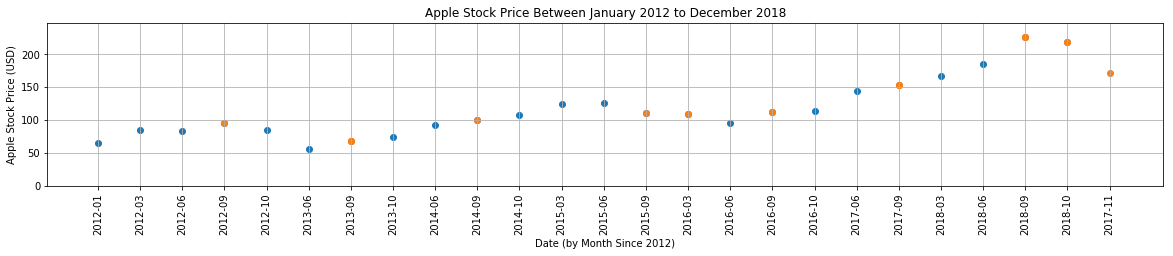

In [17]:
plt.figure(figsize=(20,3))



x_axis_stock = np.arange(len(stock_data_df))
plt.xticks(rotation='vertical')
plt.scatter(stock_event_df["event_date"], stock_event_df['event_close'], marker='o')
plt.scatter(stock_iphone_df["iphone_date"], stock_iphone_df['iphone_close'], marker='o')
#plt.xlim(-0.25, len(x_axis_dis))
plt.title("Apple Stock Price Between January 2012 to December 2018")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Apple Stock Price (USD)")
plt.ylim(0, max(stock_data_df["close"])+20)
plt.grid()
#plt.show()


In [18]:
stock_event_date=[]
stock_event_close=[]
stock_event_abbr=[]
for index, row in apple_merge.iterrows():
    if row["event"]==True:
        stock_event_date.append(row["date"])
        stock_event_close.append(row["close"])
        stock_event_abbr.append(row["abbr_date"])
stock_event =pd.DataFrame({
  "event_date" : stock_event_date,
  "event_close" : stock_event_close,
  "event_abbr" : stock_event_abbr
})        

print(stock_event.head())

  event_date  event_close event_abbr
0    2012-01    65.211429     JAN-12
1    2012-03    85.650000     MAR-12
2    2012-06    83.428571     JUN-12
3    2012-09    95.300714     SEP-12
4    2012-10    85.045714     OCT-12


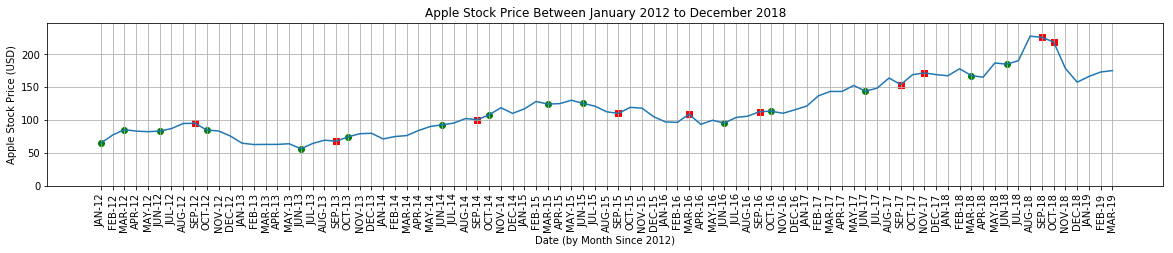

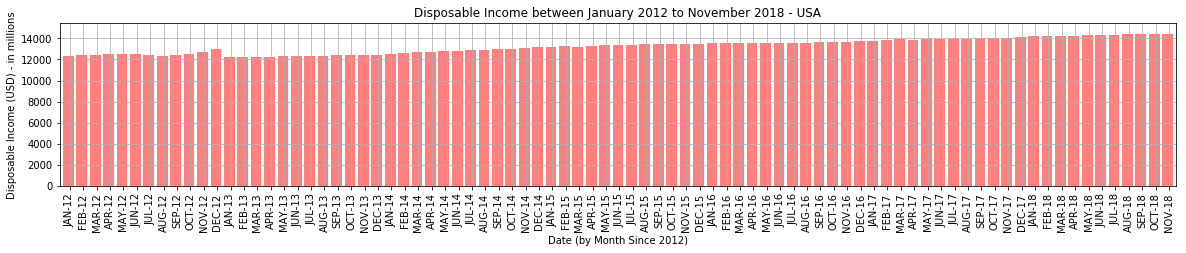

In [51]:
plt.figure(figsize=(20,3))



x_axis_stock = np.arange(len(stock_data_df))
plt.xticks(rotation='vertical')
plt.plot(stock_data_df["abbr_date"], stock_data_df['close'])
plt.scatter(stock_event["event_abbr"], stock_event['event_close'], marker='o', color='g')
plt.scatter(stock_iphone_df["iphone_abbr"], stock_iphone_df['iphone_close'], marker='s', color='r')
#plt.xlim(-0.25, len(x_axis_dis))
plt.title("Apple Stock Price Between January 2012 to December 2018")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Apple Stock Price (USD)")
plt.ylim(0, max(stock_data_df["close"])+20)
plt.grid()
#plt.show()

plt.figure(figsize=(20,3))
plt.bar(x_axis_dis, disp_income_df["Disp_Inc"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, disp_income_df["Abbr_Date"], rotation='vertical')
plt.xlim(-0.25, len(x_axis_dis))
plt.title("Disposable Income between January 2012 to November 2018 - USA")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Disposable Income (USD) - in millions")
plt.ylim(0, max(disp_income_df["Disp_Inc"])+1000)
plt.grid()
plt.show()

In [34]:
print(tick_locations)

[0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4, 9.4, 10.4, 11.4, 12.4, 13.4, 14.4, 15.4, 16.4, 17.4, 18.4, 19.4, 20.4, 21.4, 22.4, 23.4, 24.4, 25.4, 26.4, 27.4, 28.4, 29.4, 30.4, 31.4, 32.4, 33.4, 34.4, 35.4, 36.4, 37.4, 38.4, 39.4, 40.4, 41.4, 42.4, 43.4, 44.4, 45.4, 46.4, 47.4, 48.4, 49.4, 50.4, 51.4, 52.4, 53.4, 54.4, 55.4, 56.4, 57.4, 58.4, 59.4, 60.4, 61.4, 62.4, 63.4, 64.4, 65.4, 66.4, 67.4, 68.4, 69.4, 70.4, 71.4, 72.4, 73.4, 74.4, 75.4, 76.4, 77.4, 78.4, 79.4, 80.4, 81.4, 82.4, 83.4, 84.4, 85.4, 86.4]


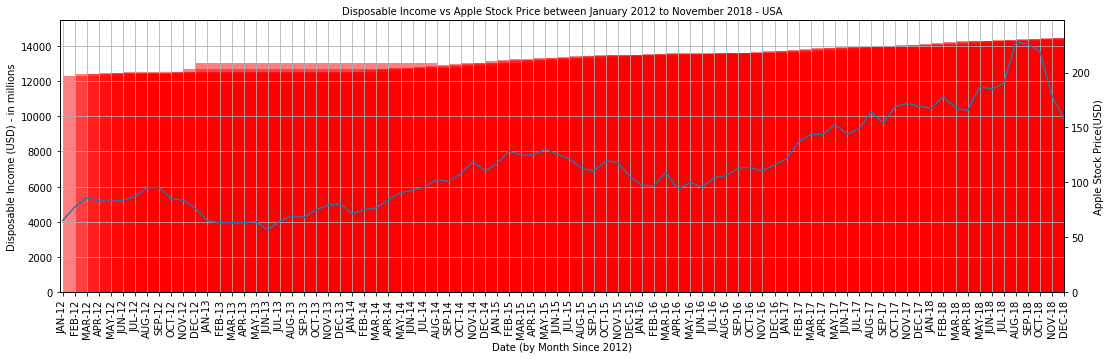

In [69]:
x_axis_stock = np.arange(len(disp_income_df))
tick_locations = [value+0.5 for value in x_axis_stock]
#fig= plt.figure(figsize=(20,6))
fig, ax1=plt.subplots()
fig.set_size_inches(18,5)
ax1.bar(x_axis_dis, disp_income_df["Disp_Inc"], color='r', alpha=0.5, align="edge",width=20)
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(disp_income_df["Abbr_Date"],rotation=90)
ax1.set_xlim(-0.25, len(x_axis_dis))
ax1.set_title("Disposable Income vs Apple Stock Price between January 2012 to November 2018 - USA", fontsize=10)

ax1.set_xlabel("Date (by Month Since 2012)", fontsize=10)
ax1.set_ylabel("Disposable Income (USD) - in millions")
ax1.set_ylim(0, max(disp_income_df["Disp_Inc"])+1000)

ax1.grid()
ax2=ax1.twinx()
ax2.plot(stock_data_df["abbr_date"], stock_data_df['close'])

ax2.set_ylabel("Apple Stock Price(USD)")
ax2.set_ylim(0, max(stock_data_df["close"])+20)

plt.show()

In [ ]:
plt.title('Times Series for the AAPL stock (monthly))')
plt.show()